# Introduzione

Vogliamo ora simulare il comportamento di un random walk e verificare che esso mostri un comportamento diffusivo. Infatti poichè per un random walk gli spostamenti sono indipendenti, valgono le ipotesi del teorema del limite centrale e dunque il mean square displacemente cresce $\propto \sqrt{N}$. In particolare, noi simuliamo il comportamento del RW sia nel caso discreto, quindi su un reticolo cubico, che nel caso continuo.


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string
from scipy.optimize import curve_fit

import seaborn as sns
sns.set_theme(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.2, color_codes=True, rc=None)

In [2]:
# Carico i dati dai file

file_MSD_discreto= "Exercises_02.2/file_MSD_discreto.txt"
file_MSD_continuo = "Exercises_02.2/file_MSD_continuous.txt"

MSD_discreto, std_MSD_discreto = np.loadtxt(file_MSD_discreto,delimiter = ",", unpack = True)
MSD_continuo, std_MSD_continuo = np.loadtxt(file_MSD_continuo,delimiter = ",", unpack = True)

number_throws = np.shape(MSD_discreto)[0]

In [3]:
# Fitto i dati
def func(x,a):
    return a*pow(x,0.5)

parametri, parametri_err = curve_fit(func,np.linspace(0,number_throws, number_throws),MSD_discreto) 

print(r'Fit discreto: '+str(parametri[0])+r' ± '+str(parametri_err[0,0]))

y = func(np.linspace(0,number_throws, number_throws),parametri[0])

parametri1, parametri1_err = curve_fit(func,np.linspace(0,number_throws, number_throws),MSD_continuo) 

print(r'Fit continuo: '+str(parametri1[0])+r' ± '+str(parametri1_err[0,0]))

y1 = func(np.linspace(0,number_throws, number_throws),parametri1[0])


Fit discreto: 0.9941265125570977 ± 2.691435807862513e-08
Fit continuo: 0.9948930546659214 ± 2.37899307256292e-08


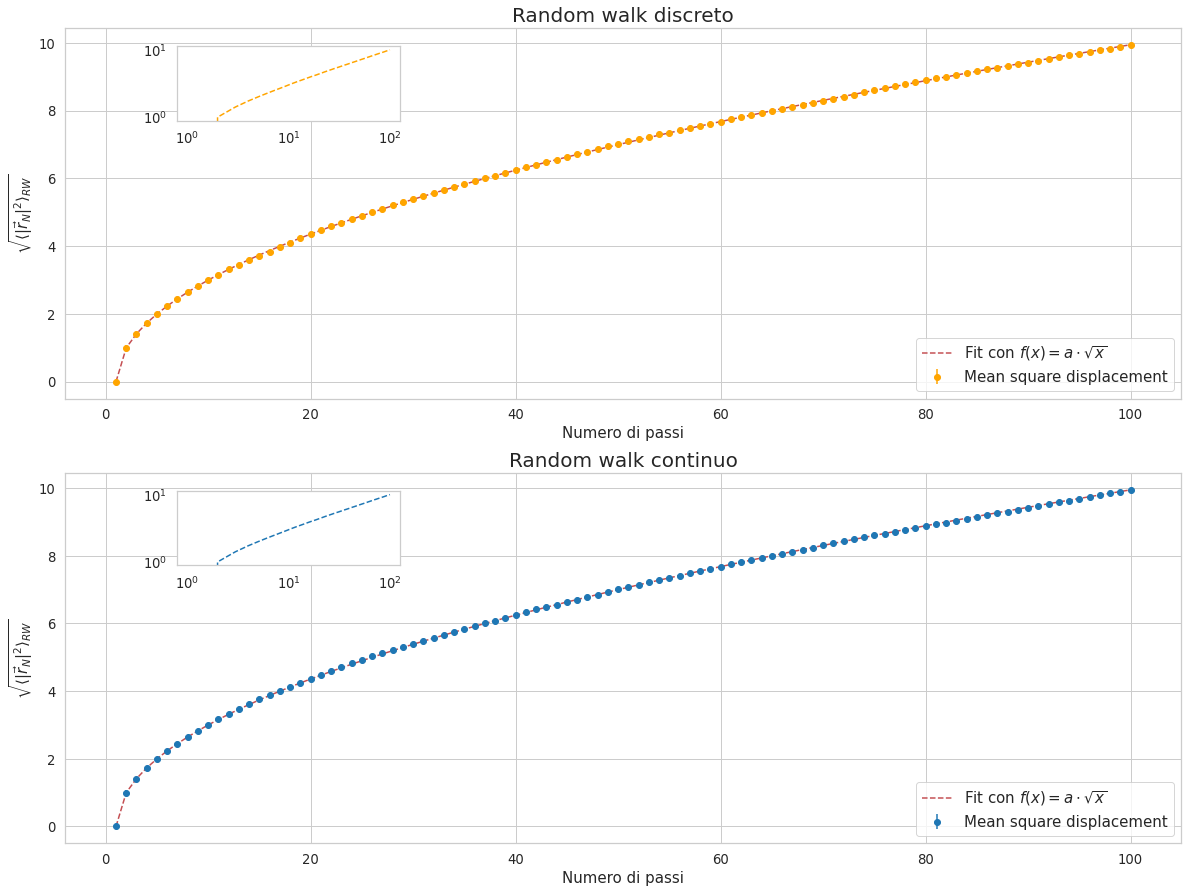

In [4]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(20,15));

ax1.errorbar(
    np.arange(1,(number_throws+1)),
    MSD_discreto,
    yerr = std_MSD_discreto,  
    marker='o', color='orange', linestyle="", label='Mean square displacement'
);

ax1.plot(
        np.arange(1,(number_throws+1)),
        y,
        'r--', label=r'Fit con $f(x)=a\cdot \sqrt{x}} $'
        )

ax1.grid(True)

ax1.set_title(f"Random walk discreto",  fontsize=20);

ax1.set_xlabel(r"Numero di passi",  fontsize=15)
ax1.set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$" ,  fontsize=15);

ax1.legend(frameon=True, loc='lower right',prop={'size': 15})

ax1_1 = ax1.inset_axes([0.1, 0.75, 0.20, 0.20])
ax1_1.plot(
    np.arange(1,(number_throws+1)),
    MSD_continuo, 
    color='orange', linestyle='--'
);
ax1_1.set_xscale("log")
ax1_1.set_yscale("log")
ax1_1.grid(False)


ax2.errorbar(
    np.arange(1,(number_throws+1)),
    MSD_continuo,
    yerr = std_MSD_continuo,  
    marker='o', color='tab:blue', label='Mean square displacement', linestyle=""
);

ax2.plot(
        np.arange(1,(number_throws+1)),
        y1,
        'r--', label=r'Fit con $f(x)=a\cdot \sqrt{x}} $'
        )

ax2.grid(True)

ax2.set_title(f"Random walk continuo",  fontsize=20);

ax2.set_xlabel(r"Numero di passi",  fontsize=15)
ax2.set_ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$" ,  fontsize=15);
ax2.legend(frameon=True, loc='lower right',prop={'size': 15})


ax2_1 = ax2.inset_axes([0.1, 0.75, 0.20, 0.20])
ax2_1.plot(
    np.arange(1,(number_throws+1)),
    MSD_continuo, 
    color='tab:blue', linestyle='--'
);
ax2_1.set_xscale("log")
ax2_1.set_yscale("log")
ax2_1.grid(False)



Attenzione: l'errore è talmente piccolo da non essere visibile.

> Vediamo che in entrambi i casi otteniamo il comportamento atteso. In particolare nell'inplot ho mostrato lo stesso grafico ma in scala logaritma così da apparezzare l'esponente 1/2. 